### 处理数据集
- 将yes/no转换成1/0
#### 大类

In [1]:
import pandas as pd
import numpy as np
LargeClass = pd.read_csv("..\\dataset\\train_dataset_metric_by_me\\LargeClass_YesNo.csv")
LargeClass = LargeClass.drop(columns=['Kind','lineno','class_name'])
LargeClass.loc[LargeClass["smell"]=='yes','smell'] = '1'
LargeClass.loc[LargeClass["smell"]=='no','smell'] = '0'

LargeClass

,degree,neighbors_count,in_degree,out_degree,self_loops,nodes_inherit,nodes_inherited,nodes_aggregate,nodes_aggregated,nodes_combinate,nodes_combinated,CLOC,NOA,NOM,smell
0,3,0,3,0,0,0,0,0,0,0,3,11.0,0.0,10.0,0
1,4,0,4,0,0,0,2,0,0,0,2,37.0,0.0,36.0,1
2,4,1,3,1,0,0,2,0,0,1,1,2.0,0.0,0.0,0
3,3,1,2,1,0,1,0,0,0,0,2,9.0,0.0,8.0,0
4,2,2,0,2,0,1,0,0,0,1,0,7.0,0.0,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,0,0,0,0,0,0,0,0,0,0,0,2.0,0.0,1.0,0
297,0,0,0,0,0,0,0,0,0,0,0,188.0,1.0,2.0,0
298,1,0,1,0,0,0,0,0,0,0,1,59.0,6.0,52.0,1
299,1,1,0,1,0,1,0,0,0,0,0,12.0,3.0,0.0,0


#### 长方法

In [2]:
LongMethod = pd.read_csv("..\\dataset\\train_dataset_metric_by_me\\LongMethod_YesNo.csv")
LongMethod = LongMethod.drop(columns=['Kind','lineno','function_name'])
LongMethod.loc[LongMethod["smell"]=='yes','smell'] = '1'
LongMethod.loc[LongMethod["smell"]=='no','smell'] = '0'

LongMethod

,degree,neighbors_count,in_degree,out_degree,self_loops,max_call_circles,MLOC,PAR,DOC,smell
0,3,2,1,2,0,0,39.0,1.0,0.0,0
1,4,3,1,3,0,0,14.0,1.0,0.0,0
2,3,1,2,1,0,0,18.0,1.0,0.0,0
3,48,2,46,2,0,0,12.0,2.0,0.0,0
4,2,2,0,2,0,0,11.0,2.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
202,5,3,2,3,0,0,102.0,2.0,0.0,1
203,3,2,1,2,0,0,14.0,7.0,0.0,0
204,3,3,0,3,0,0,116.0,2.0,0.0,1
205,6,6,0,6,0,0,186.0,3.0,0.0,1


#### 长参数列

In [3]:
LongParameterList = pd.read_csv("..\\dataset\\train_dataset_metric_by_me\\LongParameterList_YesNo.csv")
LongParameterList = LongParameterList.drop(columns=['Kind','lineno','function_name'])
LongParameterList.loc[LongParameterList["smell"]=='yes','smell'] = '1'
LongParameterList.loc[LongParameterList["smell"]=='no','smell'] = '0'

LongParameterList

,degree,neighbors_count,in_degree,out_degree,self_loops,max_call_circles,MLOC,PAR,DOC,smell
0,6,3,3,3,0,0,13.0,3.0,0.0,0
1,7,0,7,0,0,0,2.0,3.0,0.0,0
2,1,0,1,0,0,0,2.0,4.0,0.0,0
3,1,1,0,1,0,0,6.0,4.0,0.0,0
4,4,1,3,1,1,1,1.0,3.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
175,4,3,1,3,0,0,20.0,5.0,0.0,1
176,1,0,1,0,0,0,26.0,5.0,0.0,1
177,3,3,0,3,0,0,27.0,9.0,0.0,1
178,2,1,1,1,1,1,8.0,5.0,0.0,1


#### 长作用域链

In [4]:
LongScopeChaining = pd.read_csv("..\\dataset\\train_dataset_metric_by_me\\LongScopeChaining_YesNo.csv")
LongScopeChaining = LongScopeChaining.drop(columns=['Kind','lineno','function_name'])
LongScopeChaining.loc[LongScopeChaining["smell"]=='yes','smell'] = '1'
LongScopeChaining.loc[LongScopeChaining["smell"]=='no','smell'] = '0'

LongScopeChaining

,degree,neighbors_count,in_degree,out_degree,self_loops,max_call_circles,MLOC,PAR,DOC,smell
0,5,5,0,5,0,0,3.0,1.0,3.0,0
1,7,3,4,3,0,0,8.0,2.0,3.0,0
2,7,7,0,7,0,0,3.0,1.0,3.0,0
3,3,3,0,3,0,0,3.0,1.0,3.0,0
4,7,3,4,3,0,0,6.0,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...
64,1,1,0,1,0,0,6.0,1.0,5.0,1
65,1,1,0,1,0,0,0.0,0.0,0.0,1
66,1,1,0,1,0,0,0.0,0.0,0.0,1
67,1,1,0,1,0,0,0.0,0.0,0.0,1


### 拆分训练集（X）以及结果集（Y）
#### 大类

In [5]:
LargeClassX = LargeClass.iloc[:,:-1].to_numpy()
LargeClassY = LargeClass.iloc[:,-1:].to_numpy().flatten()

print(LargeClass.columns)
print(LargeClassX.shape, LargeClassY.shape)

Index(['degree', 'neighbors_count', 'in_degree', 'out_degree', 'self_loops',
       'nodes_inherit', 'nodes_inherited', 'nodes_aggregate',
       'nodes_aggregated', 'nodes_combinate', 'nodes_combinated', 'CLOC',
       'NOA', 'NOM', 'smell'],
      dtype='object')
(301, 14) (301,)


#### 长方法

In [6]:
LongMethodX = LongMethod.iloc[:,:-1].to_numpy()
LongMethodY = LongMethod.iloc[:,-1:].to_numpy().flatten()

print(LongMethod.columns)
print(LongMethodX.shape, LongMethodY.shape)

Index(['degree', 'neighbors_count', 'in_degree', 'out_degree', 'self_loops',
       'max_call_circles', 'MLOC', 'PAR', 'DOC', 'smell'],
      dtype='object')
(207, 9) (207,)


#### 长参数列

In [7]:
LongParameterListX = LongParameterList.iloc[:,:-1].to_numpy()
LongParameterListY = LongParameterList.iloc[:,-1:].to_numpy().flatten()

print(LongParameterList.columns)
print(LongParameterListX.shape, LongParameterListY.shape)

Index(['degree', 'neighbors_count', 'in_degree', 'out_degree', 'self_loops',
       'max_call_circles', 'MLOC', 'PAR', 'DOC', 'smell'],
      dtype='object')
(180, 9) (180,)


#### 长作用域链

In [8]:
LongScopeChainingX = LongScopeChaining.iloc[:,:-1].to_numpy()
LongScopeChainingY = LongScopeChaining.iloc[:,-1:].to_numpy().flatten()

print(LongScopeChaining.columns)
print(LongScopeChainingX.shape, LongScopeChainingY.shape)

Index(['degree', 'neighbors_count', 'in_degree', 'out_degree', 'self_loops',
       'max_call_circles', 'MLOC', 'PAR', 'DOC', 'smell'],
      dtype='object')
(69, 9) (69,)


### 大类训练

-------------------------------------RandomForest----------------------------------------
precision: 0.9033333333333333
recall: 0.8425
f-score: 0.8650180375180374
---------------------------------------SVC--------------------------------------
precision: 0.8908333333333334
recall: 0.625
f-score: 0.7169993894993895
-------------------------------------NB----------------------------------------
precision: 0.44202276524644946
recall: 0.7125
f-score: 0.5437633281750929


d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

-------------------------------------LR----------------------------------------
precision: 0.8198809523809523
recall: 0.49749999999999994
f-score: 0.5411904761904762


d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step


d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
d:\anaconda3\envs\pydeps\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)


d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
d:\anaconda3\envs\pydeps\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
d:\anaconda3\envs\pydeps\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error

-------------------------------------CNN----------------------------------------
1维卷积:
precision: 0.7941666666666667
recall: 0.585
f-score: 0.7042640692640693
2维卷积:
precision: 0.7775000000000001
recall: 0.5525
f-score: 0.6310461760461761


d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df),palette="Pastel1")


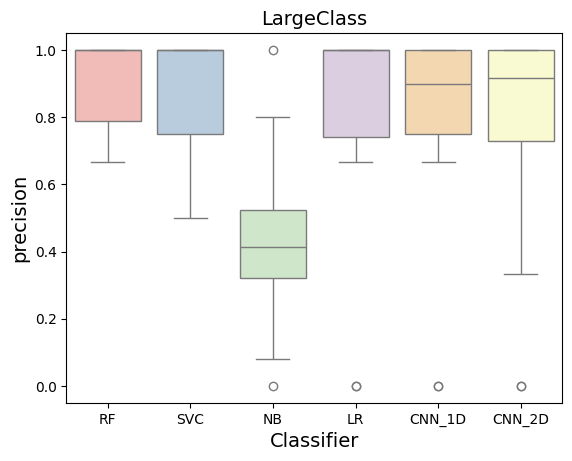

d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot2 = sns.boxplot(x="variable", y="value", data=pd.melt(df2),palette="Pastel1")


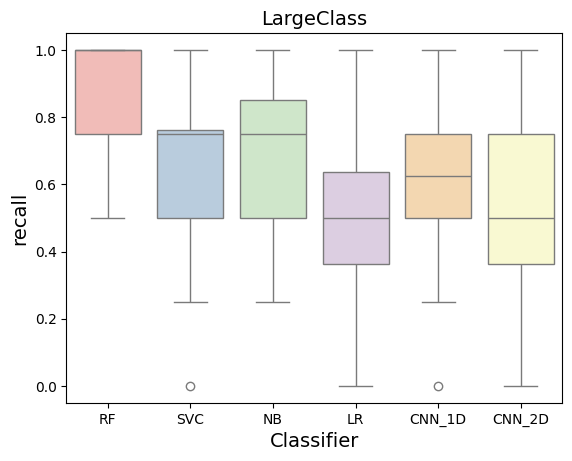

d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot3 = sns.boxplot(x="variable", y="value", data=pd.melt(df3),palette="Pastel1")


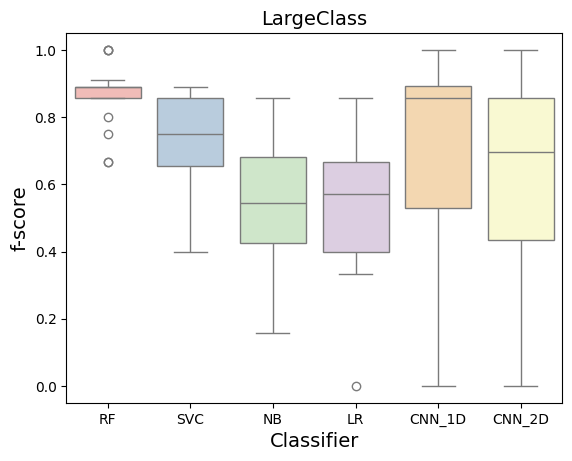

In [9]:
from model_train_function  import model_train_function 
lc_scores,lc_result = model_train_function('LargeClass',LargeClassX,LargeClassY)

### 长方法训练

-------------------------------------RandomForest----------------------------------------
precision: 0.9416666666666667
recall: 0.8541666666666666
f-score: 0.8518253968253969
---------------------------------------SVC--------------------------------------
precision: 0.9175000000000001
recall: 0.85
f-score: 0.855873015873016
-------------------------------------NB----------------------------------------
precision: 0.3687564588880378
recall: 0.8333333333333333
f-score: 0.5292958627741237


d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


-------------------------------------LR----------------------------------------
precision: 0.95
recall: 0.8583333333333332
f-score: 0.8735714285714288
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 56ms/step


d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
d:\anaconda3\envs\pydeps\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
d:\anaconda3\envs\pydeps\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error

-------------------------------------CNN----------------------------------------
1维卷积:
precision: 0.9011904761904763
recall: 0.7125
f-score: 0.7965476190476192
2维卷积:
precision: 0.8699999999999999
recall: 0.8166666666666667
f-score: 0.8197619047619048


d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df),palette="Pastel1")


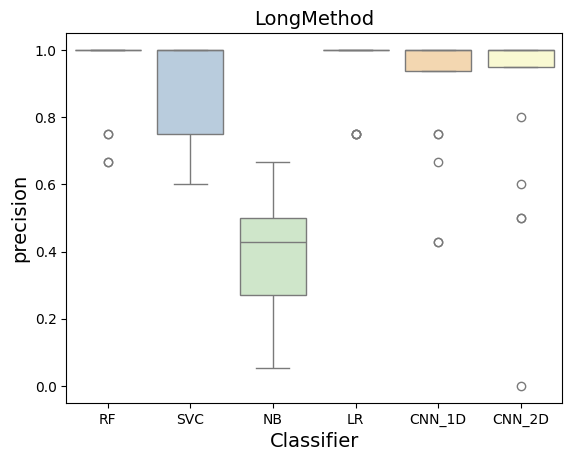

d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot2 = sns.boxplot(x="variable", y="value", data=pd.melt(df2),palette="Pastel1")


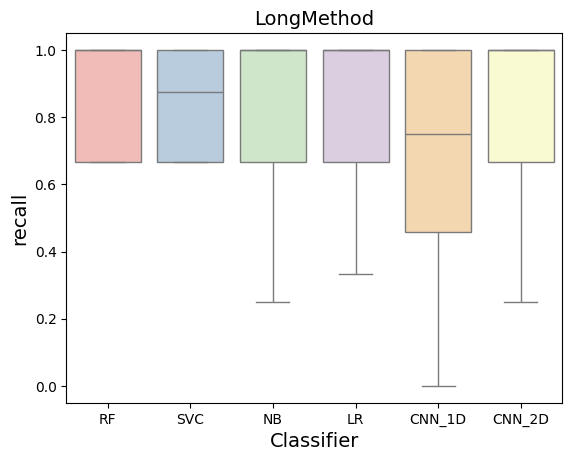

d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot3 = sns.boxplot(x="variable", y="value", data=pd.melt(df3),palette="Pastel1")


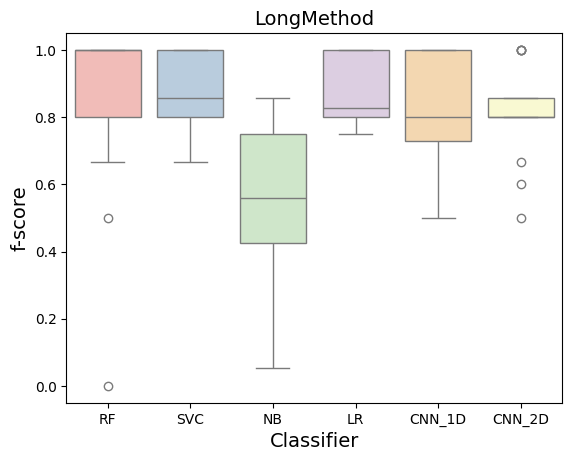

In [10]:
lm_scores,lm_result = model_train_function('LongMethod',LongMethodX,LongMethodY)

### 长参数列训练

-------------------------------------RandomForest----------------------------------------
precision: 0.8645238095238096
recall: 0.765
f-score: 0.7982800532800532
---------------------------------------SVC--------------------------------------
precision: 0.9733333333333333
recall: 0.75
f-score: 0.833386890886891
-------------------------------------NB----------------------------------------
precision: 0.22269477755009062
recall: 0.9166666666666667
f-score: 0.3648129979405937


d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


-------------------------------------LR----------------------------------------
precision: 0.96
recall: 0.7516666666666667
f-score: 0.8290404040404041
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 57ms/step
2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step


d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
d:\anaconda3\envs\pydeps\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
d:\anaconda3\envs\pydeps\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error

-------------------------------------CNN----------------------------------------
1维卷积:
precision: 0.30317460317460315
recall: 0.30833333333333335
f-score: 0.15865800865800866
2维卷积:
precision: 0.03333333333333333
recall: 0.026666666666666665
f-score: 0.04095238095238095


d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df),palette="Pastel1")


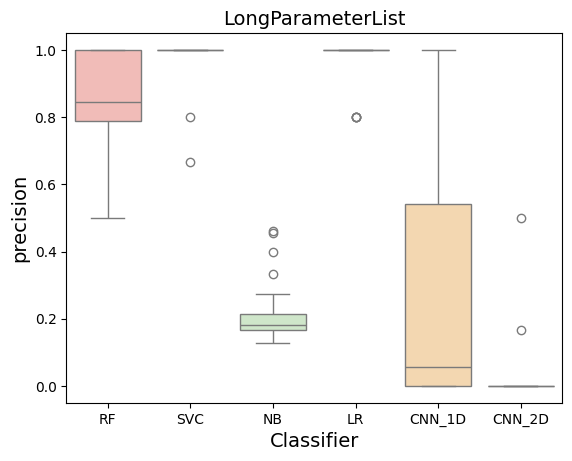

d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot2 = sns.boxplot(x="variable", y="value", data=pd.melt(df2),palette="Pastel1")


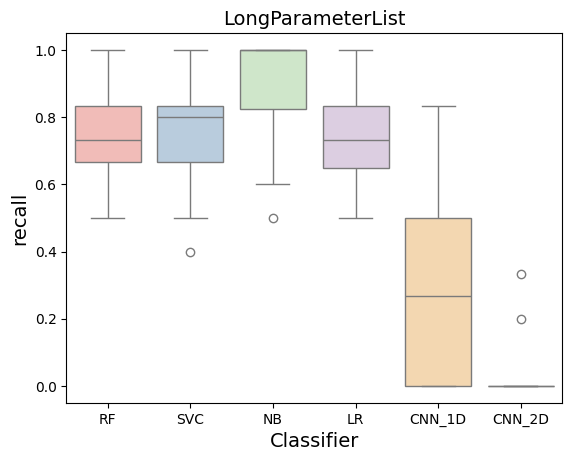

d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot3 = sns.boxplot(x="variable", y="value", data=pd.melt(df3),palette="Pastel1")


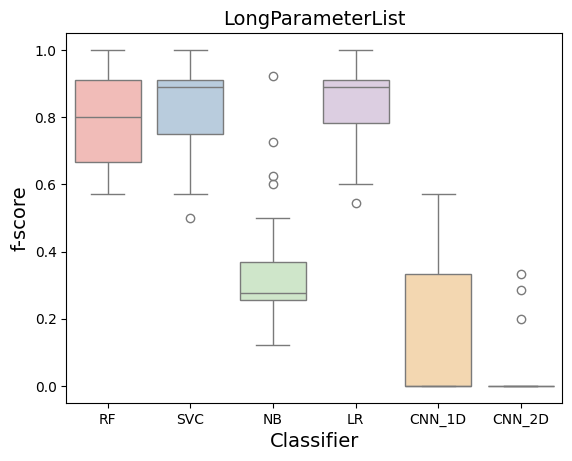

In [11]:
lpl_scores,lpl_result = model_train_function('LongParameterList',LongParameterListX,LongParameterListY)

### 长作用域链训练

-------------------------------------RandomForest----------------------------------------
precision: 0.9875
recall: 0.8166666666666667
f-score: 0.8628571428571428


d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_clas

---------------------------------------SVC--------------------------------------
precision: 0.45
recall: 0.14583333333333331
f-score: 0.20857142857142857
-------------------------------------NB----------------------------------------
precision: 0.6448717948717949
recall: 0.7333333333333333
f-score: 0.6941071428571428


d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
d:\anaconda3\envs\pydeps\Lib\site-packages\sklearn\metrics\_clas

-------------------------------------LR----------------------------------------
precision: 0.45
recall: 0.15416666666666667
f-score: 0.17833333333333332
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
d:\anaconda3\envs\pydeps\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error instead.
  X, y = self._initialize(X, y)
d:\anaconda3\envs\pydeps\Lib\site-packages\keras\src\saving\saving_lib.py:418: UserWarning: Skipping variable loading for optimizer 'rmsprop', because it has 10 variables whereas the saved optimizer has 18 variables. 
  trackable.load_own_variables(weights_store.get(inner_path))
d:\anaconda3\envs\pydeps\Lib\site-packages\scikeras\wrappers.py:925: UserWarning: ``build_fn`` will be renamed to ``model`` in a future release, at which point use of ``build_fn`` will raise an Error

-------------------------------------CNN----------------------------------------
1维卷积:
precision: 0.39166666666666666
recall: 0.12916666666666665
f-score: 0.08833333333333333
2维卷积:
precision: 0.36
recall: 0.15833333333333333
f-score: 0.23833333333333334


d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:171: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot = sns.boxplot(x="variable", y="value", data=pd.melt(df),palette="Pastel1")


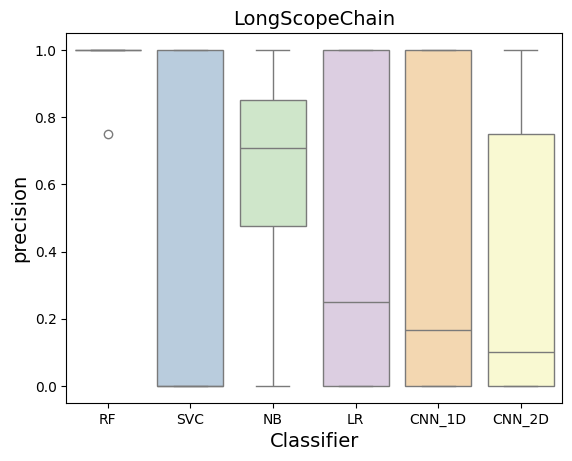

d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:179: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot2 = sns.boxplot(x="variable", y="value", data=pd.melt(df2),palette="Pastel1")


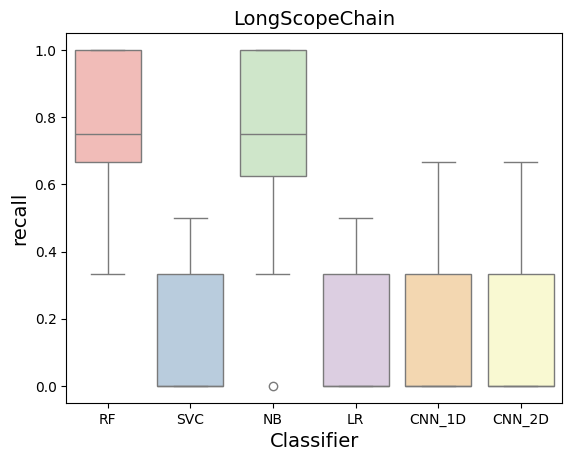

d:\BaiduNetdiskDownload\graduation_project\project_folder\machine_learning\model_train_function.py:187: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  boxplot3 = sns.boxplot(x="variable", y="value", data=pd.melt(df3),palette="Pastel1")


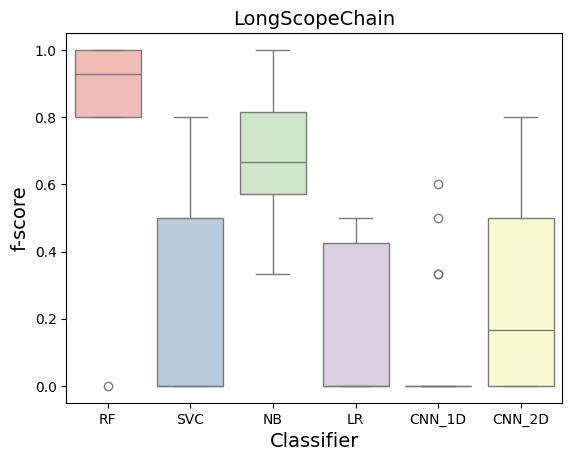

In [12]:
lsc_scores,lsc_result = model_train_function('LongScopeChain',LongScopeChainingX,LongScopeChainingY)

In [17]:
print("大类分数：")
df_lc = []
for val1 in lc_scores.values():
    rows = []
    for val2 in val1.values():
        rows.append(val2)
    df_lc.append(rows)
df_lc = pd.DataFrame(df_lc,columns=['precision','recall','f1'],index=['随机森林（rf）','支持向量机（svc）','朴素贝叶斯（nb）','逻辑回归（lr）','一维卷积（cnn_1D）','二维卷积（cnn_2D）'])
avg = [df_lc['precision'].mean(),df_lc['recall'].mean(),df_lc['f1'].mean()]
avg = pd.DataFrame([avg],columns=['precision','recall','f1'],index=['平均值（avg）'])
df_lc = pd.concat([df_lc,avg])
df_lc

大类分数：


,precision,recall,f1
随机森林（rf）,0.903333,0.842500,0.865018
支持向量机（svc）,0.890833,0.625000,0.716999
朴素贝叶斯（nb）,0.442023,0.712500,0.543763
逻辑回归（lr）,0.819881,0.497500,0.541190
一维卷积（cnn_1D）,0.794167,0.585000,0.704264
二维卷积（cnn_2D）,0.777500,0.552500,0.631046
平均值（avg）,0.771290,0.635833,0.667047


In [18]:
print("长方法分数：")
df_lm = []
for val1 in lm_scores.values():
    rows = []
    for val2 in val1.values():
        rows.append(val2)
    df_lm.append(rows)
df_lm = pd.DataFrame(df_lm,columns=['precision','recall','f1'],index=['随机森林（rf）','支持向量机（svc）','朴素贝叶斯（nb）','逻辑回归（lr）','一维卷积（cnn_1D）','二维卷积（cnn_2D）'])
avg = [df_lm['precision'].mean(),df_lm['recall'].mean(),df_lm['f1'].mean()]
avg = pd.DataFrame([avg],columns=['precision','recall','f1'],index=['平均值（avg）'])
df_lm = pd.concat([df_lm,avg])
df_lm

长方法分数：


,precision,recall,f1
随机森林（rf）,0.941667,0.854167,0.851825
支持向量机（svc）,0.917500,0.850000,0.855873
朴素贝叶斯（nb）,0.368756,0.833333,0.529296
逻辑回归（lr）,0.950000,0.858333,0.873571
一维卷积（cnn_1D）,0.901190,0.712500,0.796548
二维卷积（cnn_2D）,0.870000,0.816667,0.819762
平均值（avg）,0.824852,0.820833,0.787813


In [19]:
print("长参数列分数：")
df_lpl = []
for val1 in lpl_scores.values():
    rows = []
    for val2 in val1.values():
        rows.append(val2)
    df_lpl.append(rows)
df_lpl = pd.DataFrame(df_lpl,columns=['precision','recall','f1'],index=['随机森林（rf）','支持向量机（svc）','朴素贝叶斯（nb）','逻辑回归（lr）','一维卷积（cnn_1D）','二维卷积（cnn_2D）'])
avg = [df_lpl['precision'].mean(),df_lpl['recall'].mean(),df_lpl['f1'].mean()]
avg = pd.DataFrame([avg],columns=['precision','recall','f1'],index=['平均值（avg）'])
df_lpl = pd.concat([df_lpl,avg])
df_lpl

长参数列分数：


,precision,recall,f1
随机森林（rf）,0.864524,0.765000,0.798280
支持向量机（svc）,0.973333,0.750000,0.833387
朴素贝叶斯（nb）,0.222695,0.916667,0.364813
逻辑回归（lr）,0.960000,0.751667,0.829040
一维卷积（cnn_1D）,0.303175,0.308333,0.158658
二维卷积（cnn_2D）,0.033333,0.026667,0.040952
平均值（avg）,0.559510,0.586389,0.504188


In [20]:
print("长作用域链分数：")
df_lsc = []
for val1 in lsc_scores.values():
    rows = []
    for val2 in val1.values():
        rows.append(val2)
    df_lsc.append(rows)
df_lsc = pd.DataFrame(df_lsc,columns=['precision','recall','f1'],index=['随机森林（rf）','支持向量机（svc）','朴素贝叶斯（nb）','逻辑回归（lr）','一维卷积（cnn_1D）','二维卷积（cnn_2D）'])
avg = [df_lsc['precision'].mean(),df_lsc['recall'].mean(),df_lsc['f1'].mean()]
avg = pd.DataFrame([avg],columns=['precision','recall','f1'],index=['平均值（avg）'])
df_lsc = pd.concat([df_lsc,avg])
df_lsc

长作用域链分数：


,precision,recall,f1
随机森林（rf）,0.987500,0.816667,0.862857
支持向量机（svc）,0.450000,0.145833,0.208571
朴素贝叶斯（nb）,0.644872,0.733333,0.694107
逻辑回归（lr）,0.450000,0.154167,0.178333
一维卷积（cnn_1D）,0.391667,0.129167,0.088333
二维卷积（cnn_2D）,0.360000,0.158333,0.238333
平均值（avg）,0.547340,0.356250,0.378423
